<a href="https://colab.research.google.com/github/rfaoktvian/DelhiWeatherForecaster_Dicoding/blob/main/Time_Series_Analysis_Delhi_Weather_Forecasting_(Univariate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
df.shape

(1462, 5)

In [6]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
dates = df['date'].values
temp  = df['meantemp'].values

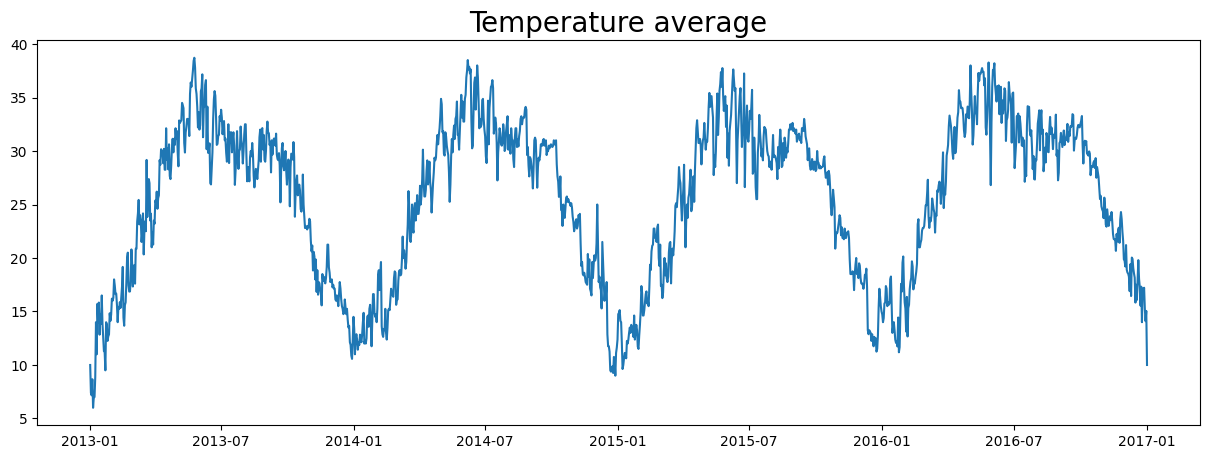

In [9]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [10]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [11]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 25.6270 - mae: 26.1270
Epoch 2/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 25.3505 - mae: 25.8505
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 25.2589 - mae: 25.7589
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 25.2904 - mae: 25.7904
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 25.5337 - mae: 26.0337
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 25.1590 - mae: 25.6590
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 25.0859 - mae: 25.5859
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 25.2470 - mae: 25.7470
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 25.3636 - mae: 25.8636
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 25.3985 - mae: 25.8985
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - loss: 25.0521 - mae: 25.5521
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 25.1837 - mae: 25.6837
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 25.1552 - mae: 25.6552
Epoch 14/10

In [13]:
forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


array([[31.273554],
       [18.011389],
       [24.626108],
       ...,
       [26.502554],
       [27.063635],
       [14.448432]], dtype=float32)